In [ ]:
import os
import base64
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/karan.verma")
from verification_guardrails import get_type_of_text

In [2]:
userid = 'Transcriber@transcription-prod'
passwd = 'TranscribePass1'
ipaddr = 'transcription-prod.mysql.database.azure.com'
db_name = 'speech_transcribe'
dest_sql = "mysql+mysqldb://" + userid + ":" + passwd + "@" + ipaddr + "/" + db_name + "?charset=utf8&use_unicode=0"
sql_engine = create_engine(dest_sql,pool_recycle=3600)
db_connection    = sql_engine.connect()


In [3]:
tables = pd.read_sql("show tables;", db_connection)
tables

,Tables_in_speech_transcribe
0,b'api_user_language'
1,b'config'
2,b'data_pipeline_conversation'
3,b'data_transcribe'
4,b'data_transcribe_app_18032020'
5,b'data_transcribe_hc'
6,b'data_transcribe_hc_05012020'
7,b'data_transcribe_hc_30092020'
8,b'data_transliterate'
9,b'data_verified'


# Analysing Data From Transcribe

In [ ]:
data_from_transcribe = pd.read_sql("select * from vs_grocery_combined_data_transcribe_30092020;", db_connection)
data_from_transcribe.head()


In [4]:
data_from_transcribe['corrected_utf_text_decoded'] = data_from_transcribe['corrected_utf_text'].apply(base64.urlsafe_b64decode).str.decode('utf8', errors='ignore').dropna()

In [5]:
data_from_transcribe.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,...,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id,corrected_utf_text_decoded
0,41966759,1,1,6710,275,154,2592,0.684045,None,2019-08-27 13:10:45,...,0,93144832,0,0,1,0,b'NA',0,None,शो मी मिल्क
1,41966760,1,11,6710,275,154,1872,0.732568,None,2019-09-04 14:55:36,...,0,89121024,0,0,1,0,b'NA',0,None,शो मी चॉकलेट्स
2,41966761,1,1,6709,275,154,1692,0.706878,None,2019-08-23 18:04:27,...,0,85823744,0,0,1,0,b'NA',0,None,चिप्स दिखाना
3,41966762,1,1,6709,275,154,2376,0.704331,None,2019-08-23 18:04:27,...,0,33412096,0,0,1,0,b'NA',0,None,चिप्स दिखाना
4,41966763,1,1,6709,275,154,2232,0.704821,None,2019-08-23 18:04:27,...,0,76517120,0,0,1,0,b'NA',0,None,चिप्स दिखाना


In [6]:
data_from_transcribe['type_of_text'] = data_from_transcribe['corrected_utf_text_decoded'].apply(get_type_of_text)

In [7]:
data_from_transcribe_usable = data_from_transcribe[(data_from_transcribe.type_of_text==0) | (data_from_transcribe.type_of_text==2)]

In [8]:
data_from_transcribe_usable['word_len'] = data_from_transcribe_usable['corrected_utf_text_decoded'].str.split().apply(len)
data_from_transcribe_usable.head()

<ipython-input-8-179b9e7a424b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_from_transcribe_usable['word_len'] = data_from_transcribe_usable['corrected_utf_text_decoded'].str.split().apply(len)


,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,...,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id,corrected_utf_text_decoded,type_of_text,word_len
0,41966759,1,1,6710,275,154,2592,0.684045,None,2019-08-27 13:10:45,...,0,0,1,0,b'NA',0,None,शो मी मिल्क,0,3
1,41966760,1,11,6710,275,154,1872,0.732568,None,2019-09-04 14:55:36,...,0,0,1,0,b'NA',0,None,शो मी चॉकलेट्स,0,3
2,41966761,1,1,6709,275,154,1692,0.706878,None,2019-08-23 18:04:27,...,0,0,1,0,b'NA',0,None,चिप्स दिखाना,0,2
3,41966762,1,1,6709,275,154,2376,0.704331,None,2019-08-23 18:04:27,...,0,0,1,0,b'NA',0,None,चिप्स दिखाना,0,2
4,41966763,1,1,6709,275,154,2232,0.704821,None,2019-08-23 18:04:27,...,0,0,1,0,b'NA',0,None,चिप्स दिखाना,0,2


In [9]:
data_from_transcribe_usable.to_csv('/home/sanyam.sood/jupyter_lab_files/transcribe_usable.csv')



<AxesSubplot:xlabel='word_len', ylabel='Count'>

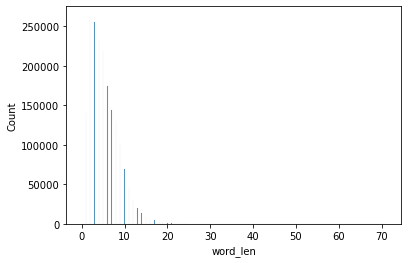

In [15]:
sns.histplot(data_from_transcribe_usable.word_len)

/home/karan.verma/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_len', ylabel='Density'>

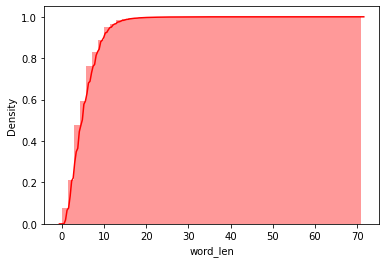

In [16]:
kwargs = {'cumulative': True}
sns.distplot(data_from_transcribe_usable.word_len, color= 'red', hist_kws=kwargs, kde_kws=kwargs)

In [41]:
data_length_less_4 = data_from_transcribe_usable[data_from_transcribe_usable.word_len<4]
data_length_less_4 = data_length_less_4.sample(frac=0.04, random_state=10)

In [42]:
data_length_greater_4 = data_from_transcribe_usable[(data_from_transcribe_usable.word_len>=4) & (data_from_transcribe_usable.word_len<10) ]
data_length_greater_4 = data_length_greater_4.sample(frac=0.35, random_state=1)

In [43]:
data_length_greater_9 = data_from_transcribe_usable[data_from_transcribe_usable.word_len>9]


In [44]:
data_length_balanced_usable = pd.concat([data_length_less_4, data_length_greater_4, data_length_greater_9])

<AxesSubplot:xlabel='word_len', ylabel='Count'>

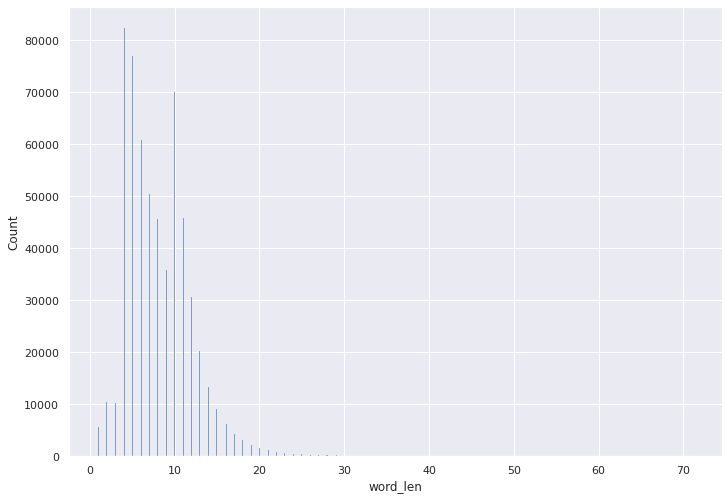

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
sns.histplot(data_length_balanced_usable.word_len)

In [21]:
data_length_balanced_usable.describe()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,pre_processed,file_id,seq_id,test_data,lang,lang_lm,current_month_verification,type_of_text,word_len
count,4.922990e+05,492299.0,492299.000000,492299.000000,492299.000000,492299.000000,492299.000000,492299.000000,492299.0,4.922990e+05,492299.0,492299.0,492299.0,492299.000000,492299.000000,492299.000000,492299.000000
mean,4.527695e+07,1.0,7.398018,6786.297307,283.855649,4241.827826,6287.096092,0.681269,0.0,5.004082e+07,0.0,0.0,1.0,0.054956,0.945143,1.154359,8.096703
std,1.284184e+06,0.0,5.723334,31.634282,2.544793,1741.088709,2246.993447,0.074610,0.0,2.883855e+07,0.0,0.0,0.0,0.464972,0.227701,0.988016,4.518995
min,4.196676e+07,1.0,1.000000,6708.000000,275.000000,0.000000,936.000000,0.000000,0.0,0.000000e+00,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000
25%,4.423946e+07,1.0,1.000000,6769.000000,284.000000,5008.000000,4644.000000,0.633665,0.0,2.510899e+07,0.0,0.0,1.0,0.000000,1.000000,0.000000,4.000000
50%,4.526242e+07,1.0,7.000000,6786.000000,285.000000,5034.000000,5616.000000,0.689336,0.0,5.005670e+07,0.0,0.0,1.0,0.000000,1.000000,2.000000,8.000000
75%,4.638099e+07,1.0,8.000000,6812.000000,285.000000,5065.000000,7056.000000,0.736272,0.0,7.501440e+07,0.0,0.0,1.0,0.000000,1.000000,2.000000,11.000000
max,4.783642e+07,1.0,18.000000,6839.000000,285.000000,5094.000000,15444.000000,0.874107,0.0,9.999923e+07,0.0,0.0,1.0,8.000000,1.000000,2.000000,71.000000


In [ ]:
data_from_transcribe.columns